## Outline
- Dummy variables
- F-test
- Adjusted $R^2$
- Interaction terms
- Stepwise regression

**Question 1**

A company that makes carseats would like to construct a model to predict sales. 

The data file https://s3-us-west-2.amazonaws.com/dsci/6002/data/carseats.csv contains 400 observations on the following 11 variables.

```
Sales:         Unit sales (in thousands) at each location
CompPrice:     Price charged by competitor at each location
Income:        Community income level (in thousands of dollars)
Advertising:   Local advertising budget for company at each location (in thousands of dollars)
Population:    Population size in region (in thousands)
Price:         Price company charges for car seats at each site
ShelveLoc:     A factor with levels Bad, Good and Medium indicating the quality of the shelving location
for the car seats at each site
Age:           Average age of the local population
Education:     Education level at each location
Urban:         A factor with levels No and Yes to indicate whether the store is in an urban or rural location
US:            A factor with levels No and Yes to indicate whether the store is in the US or not
```

<br>

1. Load in and visualize the data with the appropriate plots. The following command makes a scatter matrix plot with a lot of data easier to read:
   ```python
   pd.scatter_matrix(carseat_data, figsize=(17, 10), edgecolor='none', alpha=0.5);
   ```
   
   Use additional plots as you see appropriate. 
   
   Comment on the trends you have observed in the data.
   
   <br>

2. We can visualize categorical variables with bar plots. Use the command `carseat_data.plot(kind='bar')` to plot the categorical variables. The command is configurable by additional arguments, read the docs [here](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#bar-plots). Below is an example you can reference:

   ```python
   carseat_data['Urban'].value_counts().plot(kind='bar', ax=axs[0][0], title='Urban')
   ```

   <br>

3. To fit a multiple regression model on a categorical variable, the categorical variable must be binarized into columns which consists of either `0` or `1`.

   Use the command `binarized = pd.get_dummies(carseat_data)` to binarized all the categorical variables in the dataframe.
   
   To fit a multiple regression model, one of the dummy variables created from each categorical variable has to be removed. 
   
   For each categorical variable, pick one dummy column to remove. Use the command `binarized.drop(column_name_list, axis=1)`
   
   <br>

4. Build a multiple regression model to predict `sales` with all the variables provided. Remember to add an intercept column to the dataframe before fitting the regression model. Print the summary of the fitted model.

   <br>

5. Interpret the result given by the F-statistic and its p-value. 

   <br>
   
6. Interpret the coefficients of the model.
  
   <br>
   
7. Perform a backward stepwise regression on the model by removing statistically insignificant coefficients one at a time (starting from the most insignificant variable). Re-run the model after each variable elimination; iterate until all variables are statistically significant to obtain the final model. 

   Is it meaningful to compare the $R^2$ of the original model with the final model. Examine the adjusted $R^2$ and explain why it is more appropriate to use it here. 

   How is the fit of the final model?

Populating the interactive namespace from numpy and matplotlib


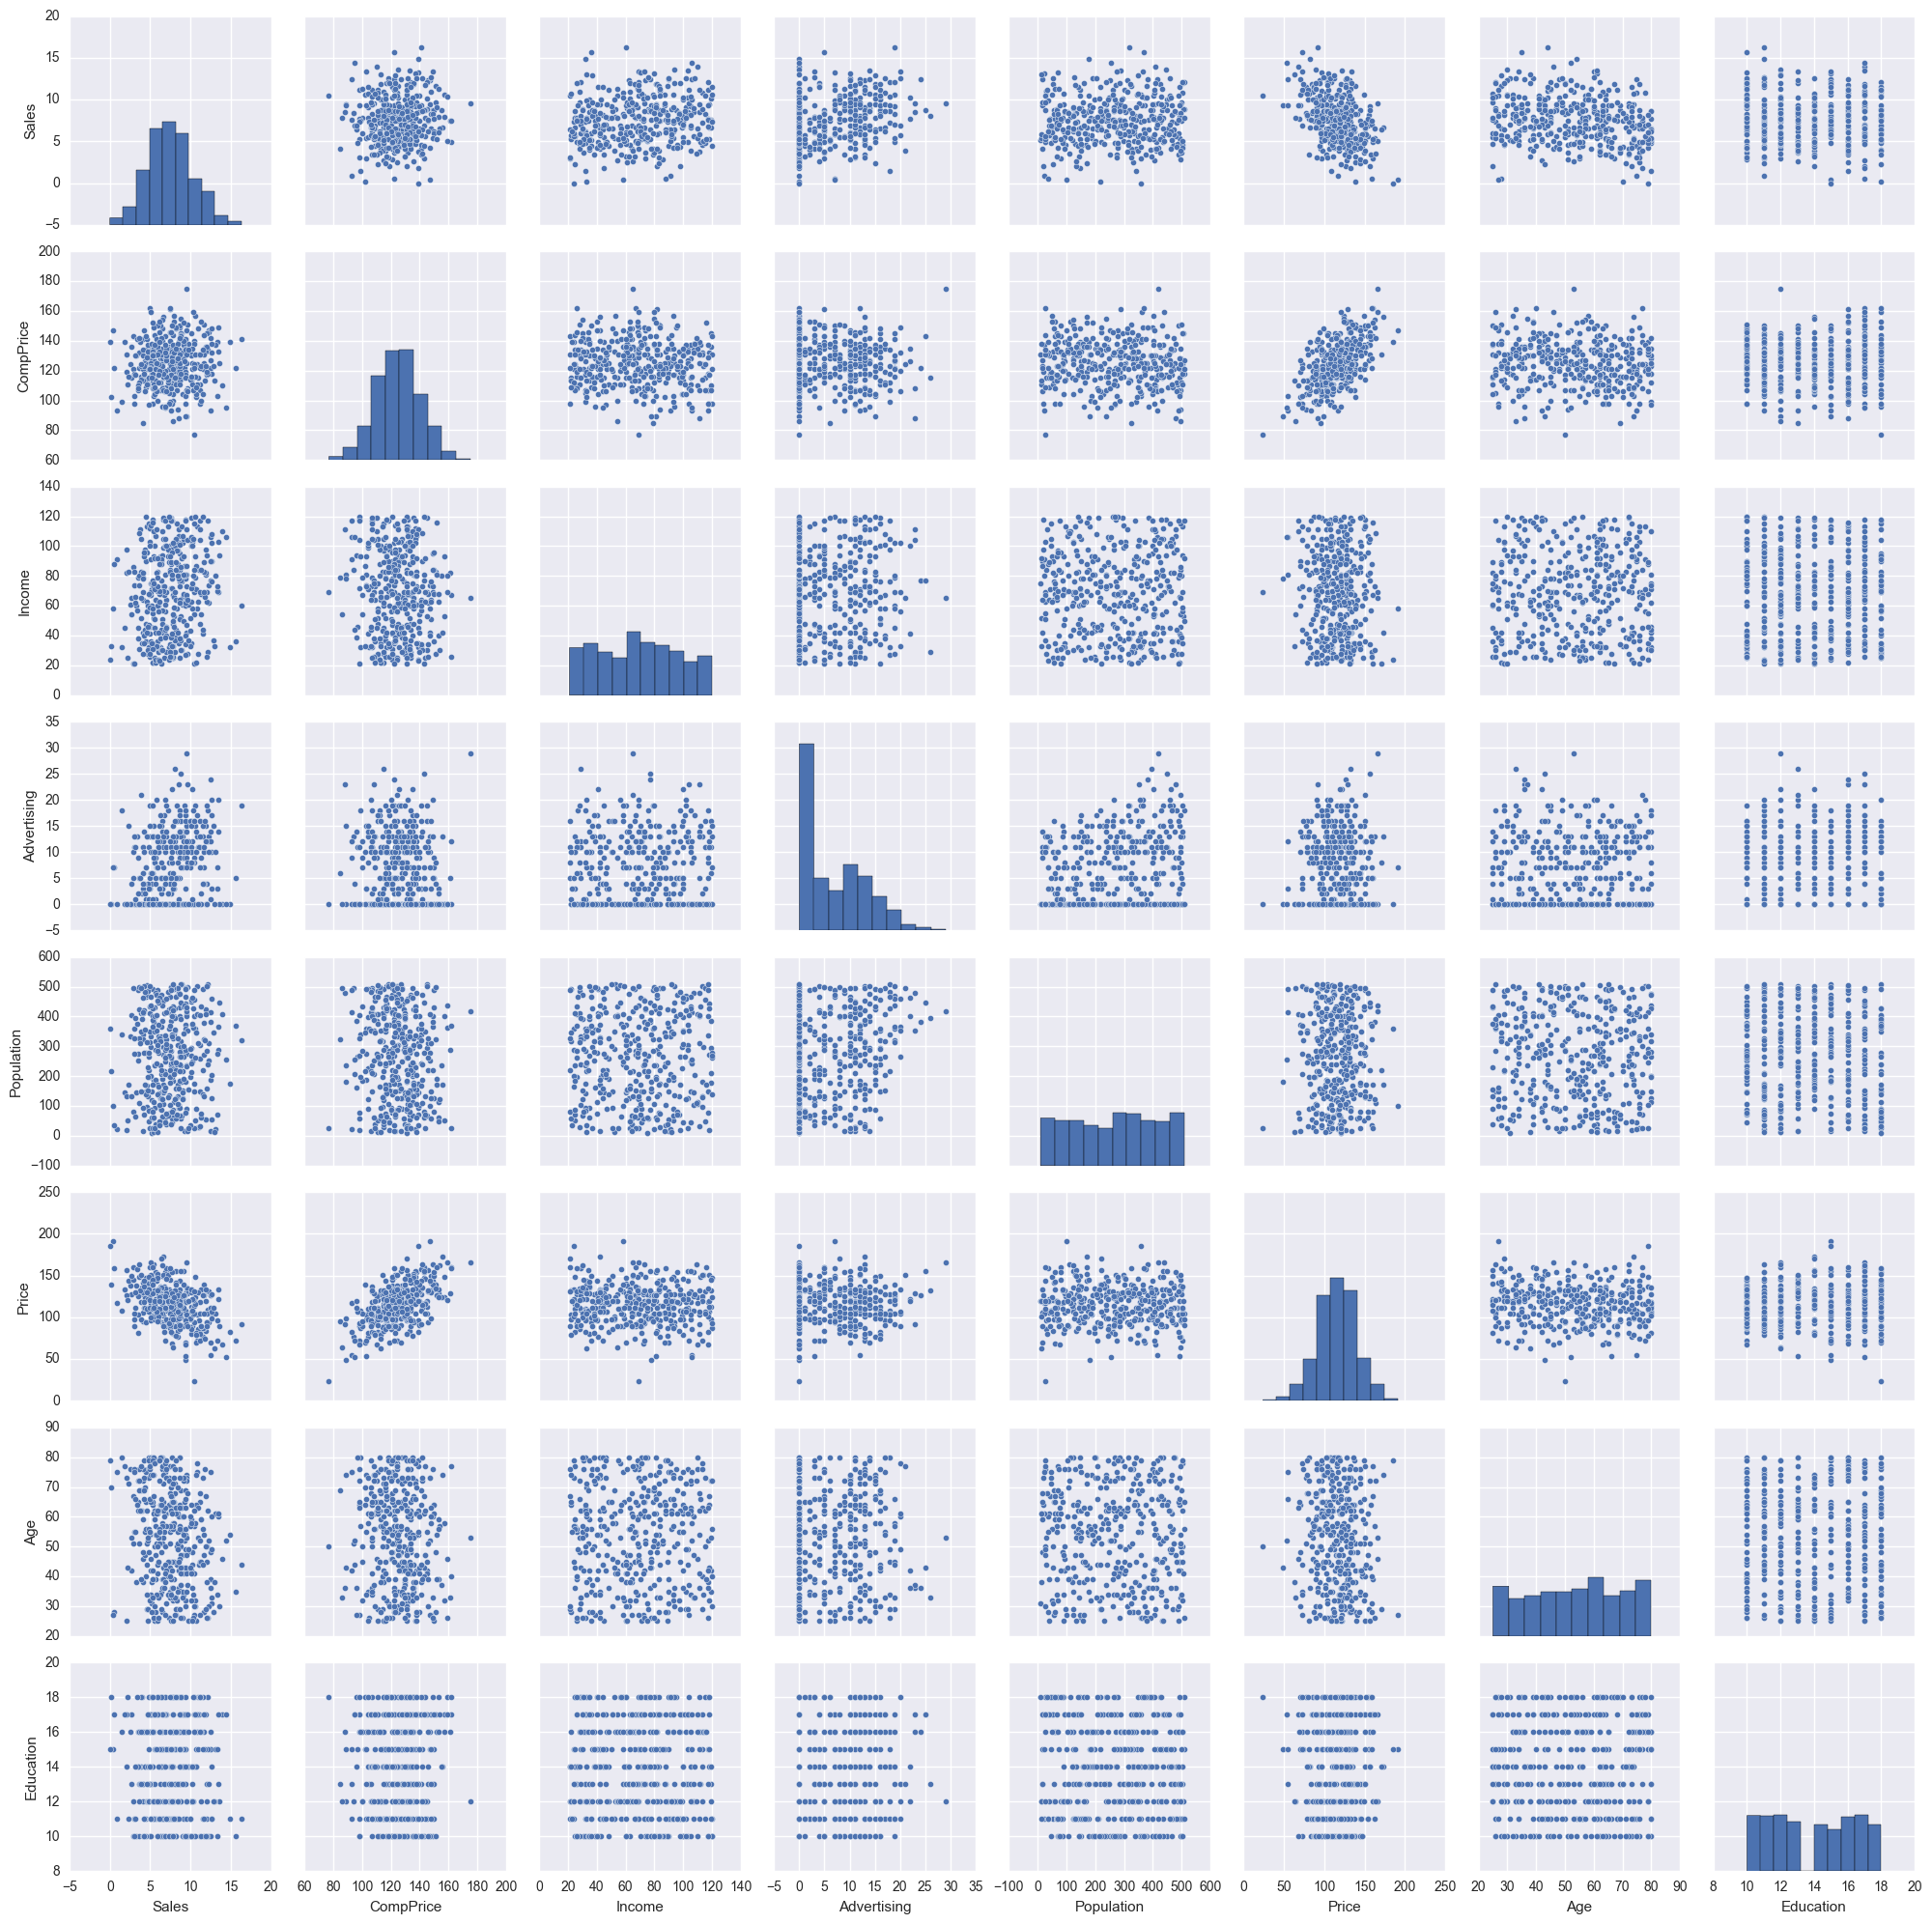

In [7]:
%pylab inline

import pandas as pd

carseat_data = pd.read_csv("https://s3-us-west-2.amazonaws.com/dsci/6002/data/carseats.csv")

from seaborn import pairplot
pairplot(carseat_data)

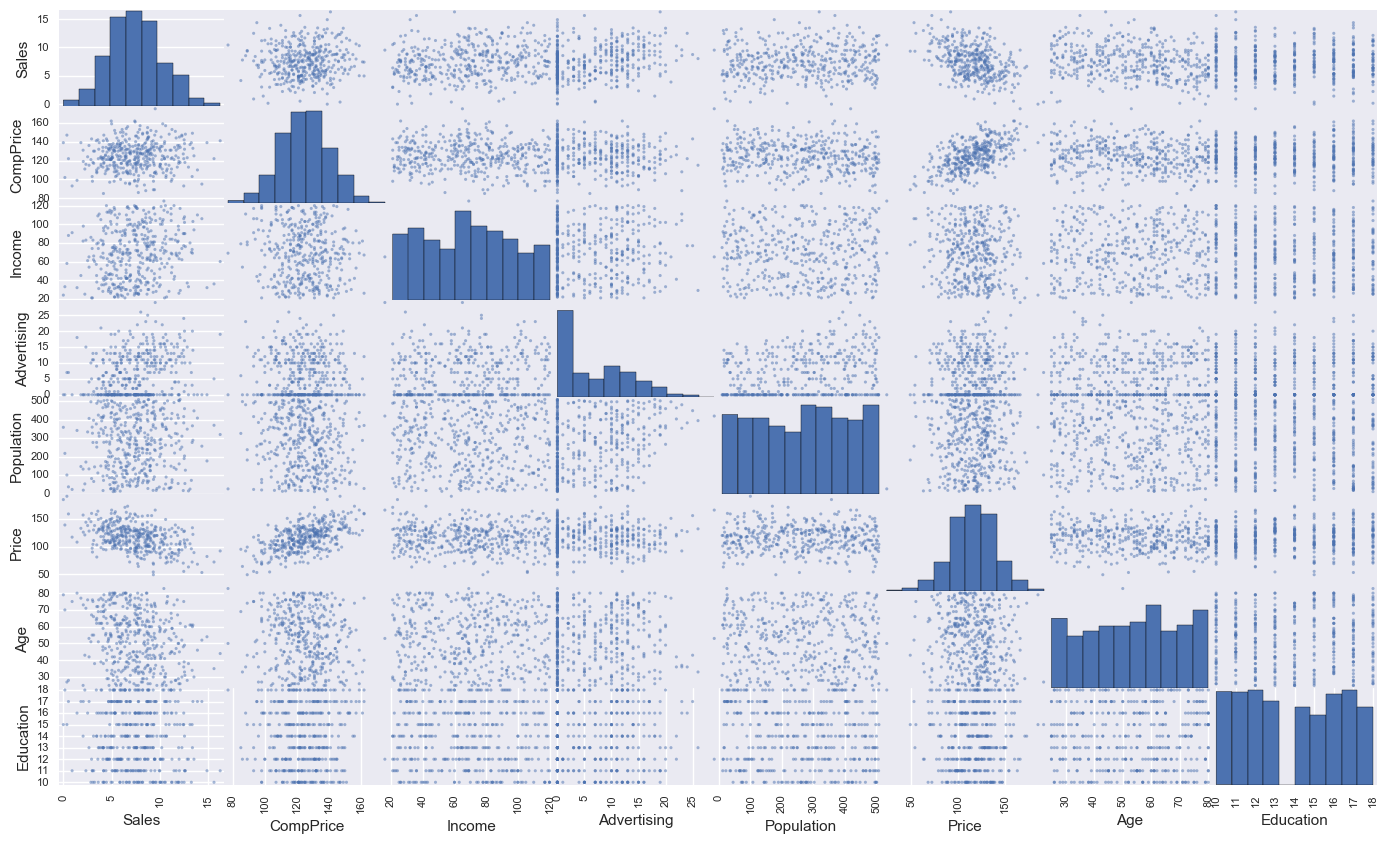

In [8]:
pd.scatter_matrix(carseat_data, figsize=(17, 10), edgecolor='none', alpha=0.5);

>Competitor price and Price show a lot of colinnearity, with a strong positive, somewhat linear relationship. Sales and Price however, show a somewhat strong negative relationship. Other variables exhibit less collinearity

>Sales, competitor prices, and price look normally distributed, based on their histograms.  Population, age and income, look somewhat uniformly distributed.

>2.

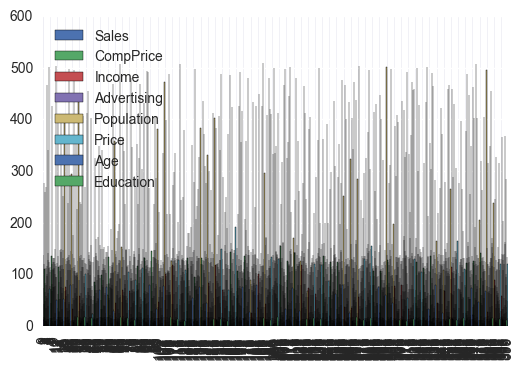

In [9]:
carseat_data.plot(kind='bar')

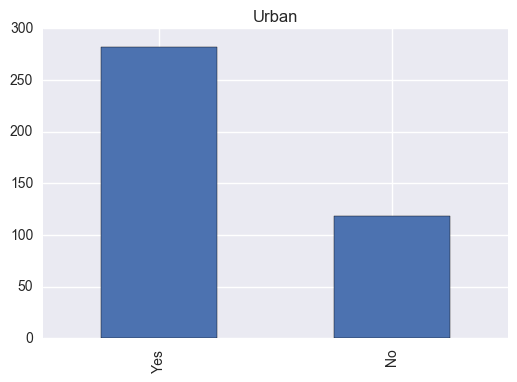

In [17]:
carseat_data['Urban'].value_counts().plot(kind='bar', title='Urban')


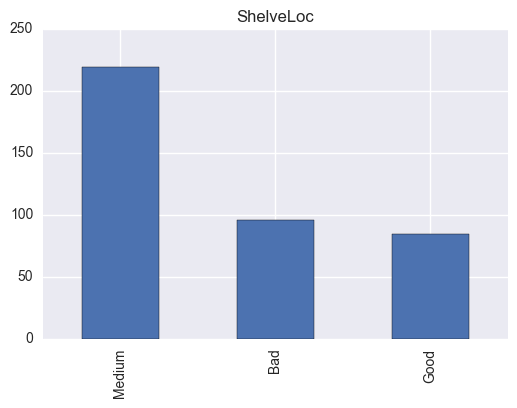

In [16]:
carseat_data['ShelveLoc'].value_counts().plot(kind='bar', title='ShelveLoc')

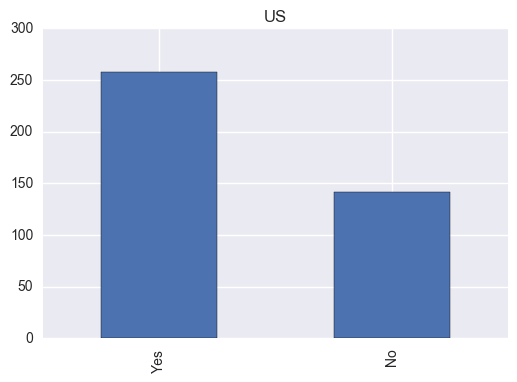

In [18]:
carseat_data['US'].value_counts().plot(kind='bar', title='US')

In [27]:
carseats_data.head()

NameError: name 'carseats_data' is not defined

In [56]:
binarized = pd.get_dummies(carseat_data)

# df = df.drop(axis = 1)
binarized.drop(['Urban_No','US_No', 'ShelveLoc_Medium'] , axis=1)

binarized.columns
# binarized.head()

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes'],
      dtype='object')

In [63]:
import statsmodels.formula.api as smf

# model2 = smf.ols(formula='Sales ~ CompPrice + Income + Advertising + Population + Price + Age + Education + ShelveLoc_Bad + ShelveLoc_Good + Urban_Yes + US_Yes', data=carseat_data)
# results2 = model2.fit()
# results2.summary()

In [70]:
binarized = pd.get_dummies(carseat_data)
binarized=binarized.drop(['ShelveLoc_Good','Urban_Yes','US_Yes'], axis=1)

y = binarized.Sales
# X = binarized.ix[:,1:]
X = binarized[['ShelveLoc_Bad', 'ShelveLoc_Medium', "Urban_No", "US_No"]]
# X = sm.add_constant(X)  # <- add in constant term

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     153.9
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           2.64e-79
Time:                        16:07:49   Log-Likelihood:                -1212.2
No. Observations:                 400   AIC:                             2432.
Df Residuals:                     396   BIC:                             2448.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
ShelveLoc_Bad        4.3970      0.554      7.944      0.000         3.309     5.485
ShelveLoc_Medium     5.9124      0.416     14.199      0.000         5.094     6.731
Urban_No             2.8048      0.530      5.294      0.000         1.763     3.846
US_No                1.3641      0.514      2.656      0.008         0.354     2.374
==============================================================================
Omnibus:                       29.452   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.153
Skew:                           0.711   Prob(JB):                     3.84e-08
Kurtosis:                       3.168   Cond. No.                         2.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# 4.

y = binarized.Sales
X = binarized.ix[:,1:]
# X = binarized[['ShelveLoc_Bad', 'ShelveLoc_Medium', "Urban_No", "US_No"]]
X = sm.add_constant(X)  # <- add in constant term

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Thu, 06 Oct 2016   Prob (F-statistic):          1.60e-166
Time:                        16:28:40   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               10.4496      0.608     17.197      0.000         9.255    11.644
CompPrice            0.0928      0.004     22.378      0.000         0.085     0.101
Income               0.0158      0.002      8.565      0.000         0.012     0.019
Advertising          0.1231      0.011     11.066      0.000         0.101     0.145
Population           0.0002      0.000      0.561      0.575        -0.001     0.001
Price               -0.0954      0.003    -35.700      0.000        -0.101    -0.090
Age                 -0.0460      0.003    -14.472      0.000        -0.052    -0.040
Education           -0.0211      0.020     -1.070      0.285        -0.060     0.018
ShelveLoc_Bad       -4.8502      0.153    -31.678      0.000        -5.151    -4.549
ShelveLoc_Medium    -2.8935      0.131    -22.106      0.000        -3.151    -2.636
Urban_No            -0.1229      0.113     -1.088      0.277        -0.345     0.099
US_No                0.1841      0.150      1.229      0.220        -0.111     0.479
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

ho : all the betas = 0
ha : at least 1 beta nonzero
alpha = .05

> The F-statistic looks very good, it was used to calcualte a p value of 1.60e-166, so we reject the null hypothesis that all the weights of the predictors are 0.

> When all the continuous variables are 0 and ShelveLoc is Good and it is Urban is Yes and US is Yes, our default sales is 10.44

For every unit increase in CompPrice, sales increase by 0.0928

For every unit increase in Income sales increases by 0.0158

For every unit increase in Advertising	by 0.1231	
For every unit increase in Population	by 0.0002

For every unit increase in Price	-0.0954	

For every unit increase in Age	-0.0460	0.003

For every unit increase in Education	-0.0211, 

when all the other variables are kept fixed.

However, when ShelveLoc = Bad, our sales decreases by 4.850, while

when ShelveLoc = Medium, our sales decreases by 2.893

If Urban_No	, sales decreases by 0.1229, and 

if US_No, sales increases by 0.1841

In [79]:
y = binarized.Sales
X = binarized.ix[:,1:]
# X = binarized.ix[:,[1,2,3,4,5,6,7,8,9,10,11]]
# X = binarized.ix[:,[1,2,3,4,5,6,7,8,9,10]]
# X = binarized.ix[:,[1,2,3,4,5,6,7,8,9]]
# X = binarized.ix[:,[1,2,3,5,6,7,8,9]]
X = binarized.ix[:,[1,2,3,5,6,8,9]]
# X = binarized.drop(['v'] , axis=1)

# X = binarized[['ShelveLoc_Bad', 'ShelveLoc_Medium', "Urban_No", "US_No"]]
X = sm.add_constant(X)  # <- add in constant term

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     381.4
Date:                Thu, 06 Oct 2016   Prob (F-statistic):          1.25e-170
Time:                        16:33:01   Log-Likelihood:                -571.24
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     392   BIC:                             1190.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               10.3109      0.511     20.180      0.000         9.306    11.315
CompPrice            0.0926      0.004     22.451      0.000         0.084     0.101
Income               0.0158      0.002      8.590      0.000         0.012     0.019
Advertising          0.1159      0.008     15.006      0.000         0.101     0.131
Price               -0.0953      0.003    -35.699      0.000        -0.101    -0.090
Age                 -0.0461      0.003    -14.521      0.000        -0.052    -0.040
ShelveLoc_Bad       -4.8357      0.152    -31.710      0.000        -5.135    -4.536
ShelveLoc_Medium    -2.8837      0.131    -22.083      0.000        -3.140    -2.627
==============================================================================
Omnibus:                        0.766   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.810
Skew:                           0.104   Prob(JB):                        0.667
Kurtosis:                       2.929   Cond. No.                     1.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

it is not meaningful to comprea the R^2, you should instead look at the adjusted R^2, because that accounts for k, which is the number of variables.  the R^2 dividies by n-1, the adjusted divides by n-k-1

The R-squared is 0.872, which means that 87% of the variability in Price can be predicted from our variables, which is a good fit.

**Question 2**

The  `toothgrowth` table consists of four columns:
```
subj_id: Guinea pig identifier (PK)
len: Length of the tooth
supp: VC (Vitamin C) or OJ (Orange Juice)
dose: Dosage of OJ or VC
```

<br>

1. Encode the `supp` column where `VC` (vitamin C) is expressed by 0 and `OJ` (orange juice) is expressed by 1.

   <br>

2. Build a model using `supp` and `dose` to predict `len`. Comment on the fit and coefficients of the model.
   
   <br>

3. Include the interaction term between `dose` and `supp` and re-run the model. Does the new model fit the data better?

   <br>
   
4. Based on the coefficients given by the model, plot the `dose` (x) against `len` (y) for each of the two categories of `supp`. 

   Comment on the interaction effect between `supp` and `dose` on `len`.

In [104]:
%pylab inline

import pandas as pd
import statsmodels.api as sm
import yaml

from seaborn import pairplot
from sqlalchemy import create_engine

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

toothgrowth = pd.read_sql("SELECT * FROM toothgrowth;", engine)
toothgrowth_original = pd.read_sql("SELECT * FROM toothgrowth;", engine)


Populating the interactive namespace from numpy and matplotlib


In [94]:
toothgrowth.tail()

,subj_id,len,supp,dose
55,55,30.9,OJ,2.0
56,56,26.4,OJ,2.0
57,57,27.3,OJ,2.0
58,58,29.4,OJ,2.0
59,59,23.0,OJ,2.0


In [93]:
pd.get_dummies?

In [100]:
model2 = smf.ols(formula='len ~ supp + dose', data=toothgrowth)
results2 = model2.fit()
results2.summary()

# binarized = pd.get_dummies(toothgrowth)
# print(binarized.columns)

# binarized.tail()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    len   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     67.72
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           8.72e-16
Time:                        16:49:00   Log-Likelihood:                -170.21
No. Observations:                  60   AIC:                             346.4
Df Residuals:                      57   BIC:                             352.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.2725      1.282      7.231      0.000         6.705    11.840
supp[T.VC]    -3.7000      1.094     -3.383      0.001        -5.890    -1.510
dose           9.7636      0.877     11.135      0.000         8.008    11.519
==============================================================================
Omnibus:                        3.498   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                2.537
Skew:                           0.344   Prob(JB):                        0.281
Kurtosis:                       2.264   Cond. No.                         4.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#2. 

The model is good because the R^2 is .704, which means that 70% of the variability in len can be predicted by the model.  The Prob (F-statistic) is 8.72e-16, which means we can reject the null, meaning that some relation does exist.

When the dose = 0 and VC = 0 (meaning OJ = 1), then the len = 9.27.

For every unit increase of dose, len increases by 9.7636.

#3.

In [101]:
model2 = smf.ols(formula='len ~ supp * dose', data=toothgrowth)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    len   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     50.36
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           6.52e-16
Time:                        16:55:48   Log-Likelihood:                -167.48
No. Observations:                  60   AIC:                             343.0
Df Residuals:                      56   BIC:                             351.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          11.5500      1.581      7.304      0.000         8.382    14.718
supp[T.VC]         -8.2550      2.236     -3.691      0.001       -12.735    -3.775
dose                7.8114      1.195      6.534      0.000         5.417    10.206
supp[T.VC]:dose     3.9043      1.691      2.309      0.025         0.518     7.291
==============================================================================
Omnibus:                        1.508   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.169
Skew:                           0.097   Prob(JB):                        0.558
Kurtosis:                       2.344   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adj. R-squared:	0.715, which is higer, as well as improved BIC and AIC.  In addition, all of our variables have significant p-values.  This leaves us to belive that the interaction likely exists.

In [106]:
vc = toothgrowth_original[toothgrowth_original['supp'] == 'VC']

oj = toothgrowth_original[toothgrowth_original['supp'] == 'OJ']

In [107]:
vc.head()

,subj_id,len,supp,dose
0,0,4.2,VC,0.5
1,1,11.5,VC,0.5
2,2,7.3,VC,0.5
3,3,5.8,VC,0.5
4,4,6.4,VC,0.5


In [108]:
oj.head()

,subj_id,len,supp,dose
30,30,15.2,OJ,0.5
31,31,21.5,OJ,0.5
32,32,17.6,OJ,0.5
33,33,9.7,OJ,0.5
34,34,14.5,OJ,0.5


In [111]:
plot?

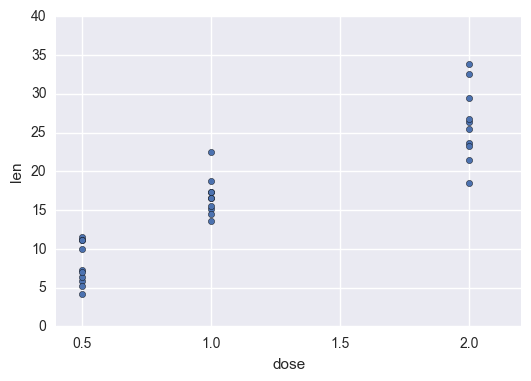

In [113]:
import seaborn as sns

vc.plot("dose", "len", kind = "scatter")

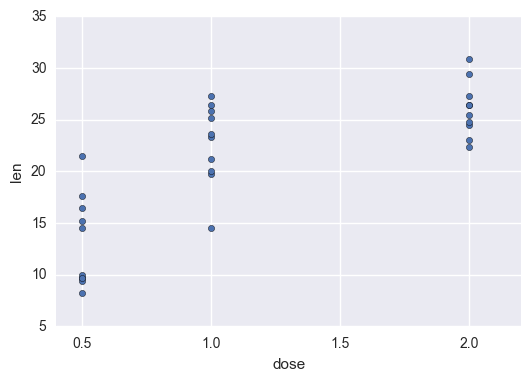

In [114]:
oj.plot("dose", "len", kind = "scatter")

When dose is 1, and supp is oj, we see significant lift in len veruss, when supp is vc.

also, When dose is .5, and supp is oj, we see some lift in len veruss, when supp is vc.

At dose of 2, the effects of supp and dosage on len level out, and we see less difference between the two supps.